In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy() 

<Axes: ylabel='Frequency'>

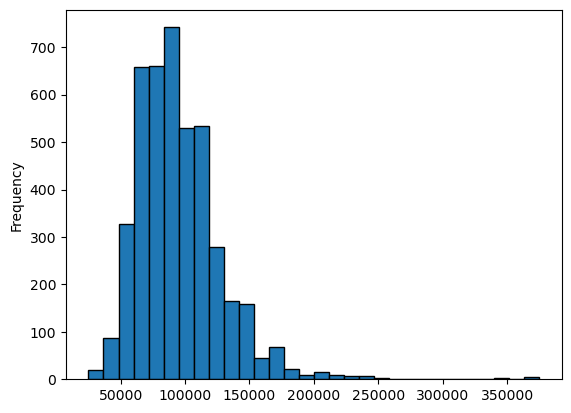

In [7]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black') # since 8 bins are provided we can elongate the number of bins to get bin width shorter. And edge color can be used to segregate the bins.

Text(0.5, 0, 'Yearly Salary')

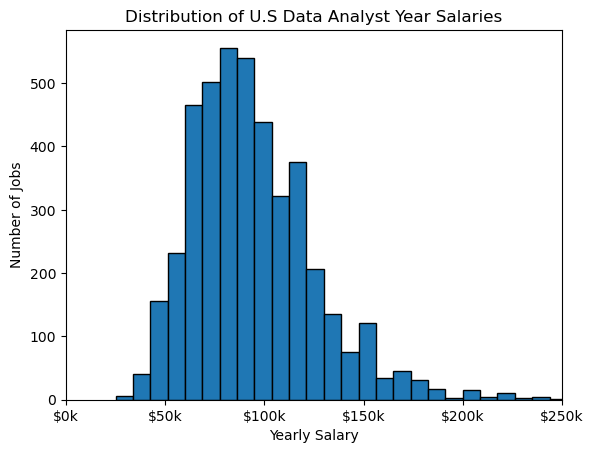

In [11]:
# we can't find much value after after 250,000 dollars. hence,

df_DA_US['salary_year_avg'].plot(kind='hist', bins=40, edgecolor='black')
plt.xlim(0, 250000)

# formatting x axis.
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))

plt.title('Distribution of U.S Data Analyst Year Salaries')
plt.ylabel('Number of Jobs')
plt.xlabel('Yearly Salary')